# Importing of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv(r"house-price-dataset.csv")
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


# Data Cleaning

In [3]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [4]:
df = df.drop(['id', 'Date', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude'], axis = 1)
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,2470,4000,2,51,1400000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,2940,6600,1,53,1200000
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,3350,42847,3,76,838000
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,2060,4500,1,51,805000
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,2380,4750,1,67,790000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14619 non-null  int64  
 1   number of bathrooms                    14619 non-null  float64
 2   living area                            14619 non-null  int64  
 3   lot area                               14619 non-null  int64  
 4   number of floors                       14619 non-null  float64
 5   waterfront present                     14619 non-null  int64  
 6   number of views                        14619 non-null  int64  
 7   condition of the house                 14619 non-null  int64  
 8   grade of the house                     14619 non-null  int64  
 9   Area of the house(excluding basement)  14619 non-null  int64  
 10  Area of the basement                   14619 non-null  int64  
 11  li

In [6]:
df.isnull().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [7]:
for i in df.columns: print(i, ':\n', df[i].unique())

number of bedrooms :
 [ 4  5  3  2  7  6  9  1  8 33 10 11]
number of bathrooms :
 [2.5  2.75 2.   3.25 1.75 2.25 1.   1.5  3.   8.   3.5  4.25 4.   5.
 3.75 4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 6.75 7.5  0.5  6.
 7.75]
living area :
 [ 2920  2910  3310  2710  2600  3660  2240  2390  2200  2820  1820  1520
  1750  2730  2360  3240  2330  1940  2860  1600  2190   880  2210  1710
  2680  2430  1270  2160   800  1770  1970  1450  1920  2000  1570  1930
  1960  3630  1320  1560  3110  1090  1350  1580  1160  1340   850  2540
  1630  1850  2090  1800  1180  1480  1370  1200  1210   900  1650  1010
  2850  2280  2530 13540  2220  4010  4340  3190  1330  4420  4490  3690
  2170  3400  3180  2350  2120  2010  2450  2490  1680  2800  1390  2440
  1990  2300  1670  1880  1900  1140  2740  2550  1790  2070  3200  2340
  3040  1840  1590  1410  1408  1620  2110   840  2230  3090  1571  1120
  2370  2310  1050  1550  1240  2050   810  1490  4510  3760  3490  3370
  2690  3020  3740  3880  2

In [8]:
for i in ['number of bathrooms', 'number of floors']: df[i] = df[i].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   number of bedrooms                     14619 non-null  int64
 1   number of bathrooms                    14619 non-null  int32
 2   living area                            14619 non-null  int64
 3   lot area                               14619 non-null  int64
 4   number of floors                       14619 non-null  int32
 5   waterfront present                     14619 non-null  int64
 6   number of views                        14619 non-null  int64
 7   condition of the house                 14619 non-null  int64
 8   grade of the house                     14619 non-null  int64
 9   Area of the house(excluding basement)  14619 non-null  int64
 10  Area of the basement                   14619 non-null  int64
 11  living_area_renov           

# Data Analysis

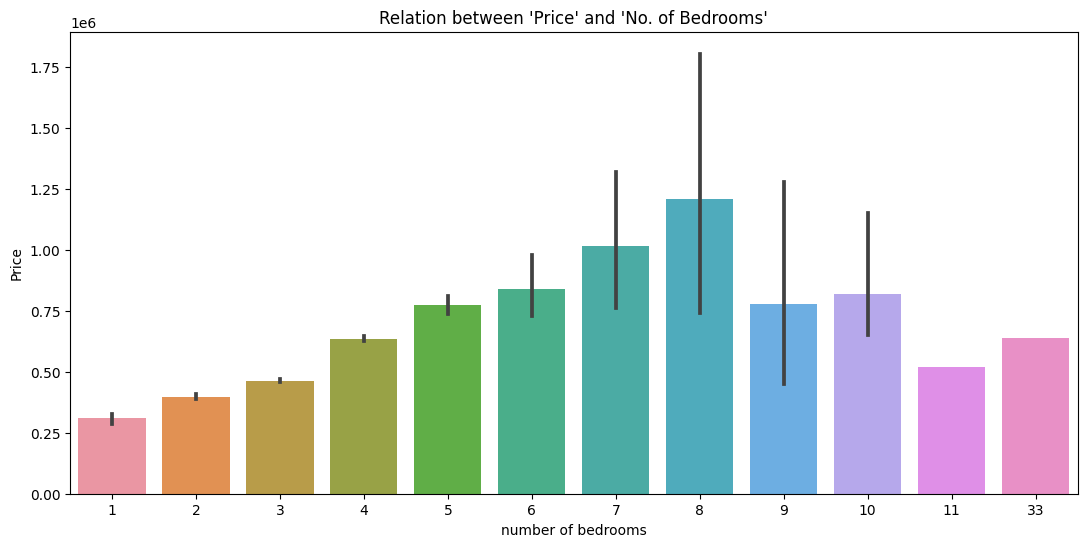

In [9]:
plt.figure(figsize = (13,6))
sns.barplot(data = df, x = 'number of bedrooms', y = 'Price')
plt.title("Relation between 'Price' and 'No. of Bedrooms'") 
plt.show()

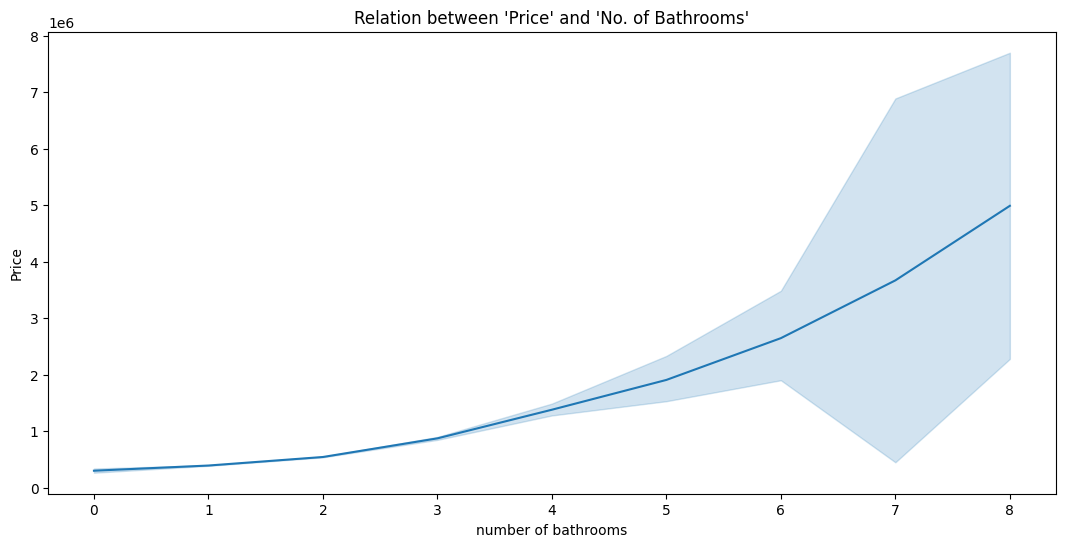

In [10]:
plt.figure(figsize = (13,6))
sns.lineplot(data = df, x = 'number of bathrooms', y = 'Price')
plt.title("Relation between 'Price' and 'No. of Bathrooms'") 
plt.show()

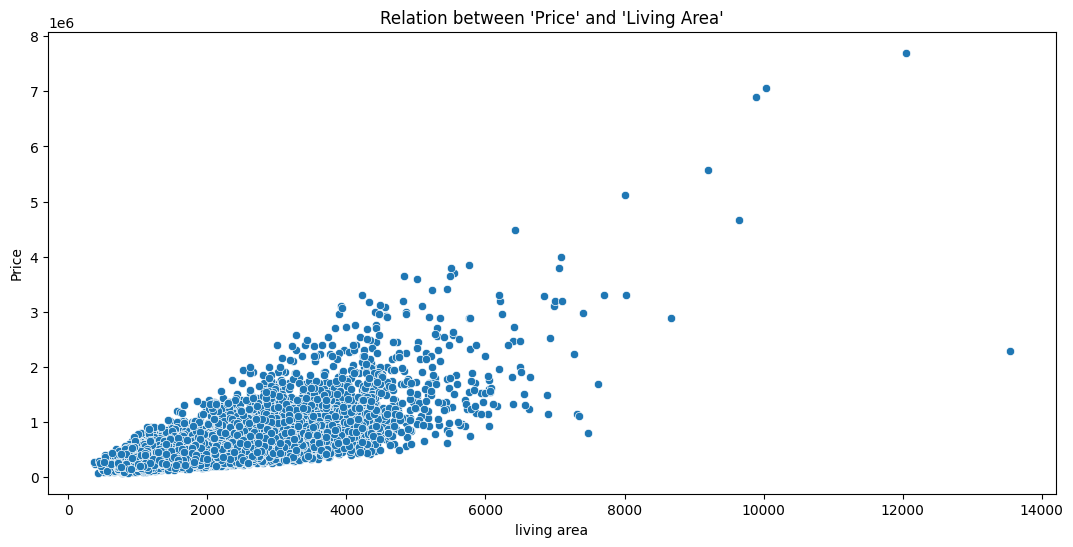

In [11]:
plt.figure(figsize = (13,6))
sns.scatterplot(data = df, x = 'living area', y = 'Price')
plt.title("Relation between 'Price' and 'Living Area'") 
plt.show()

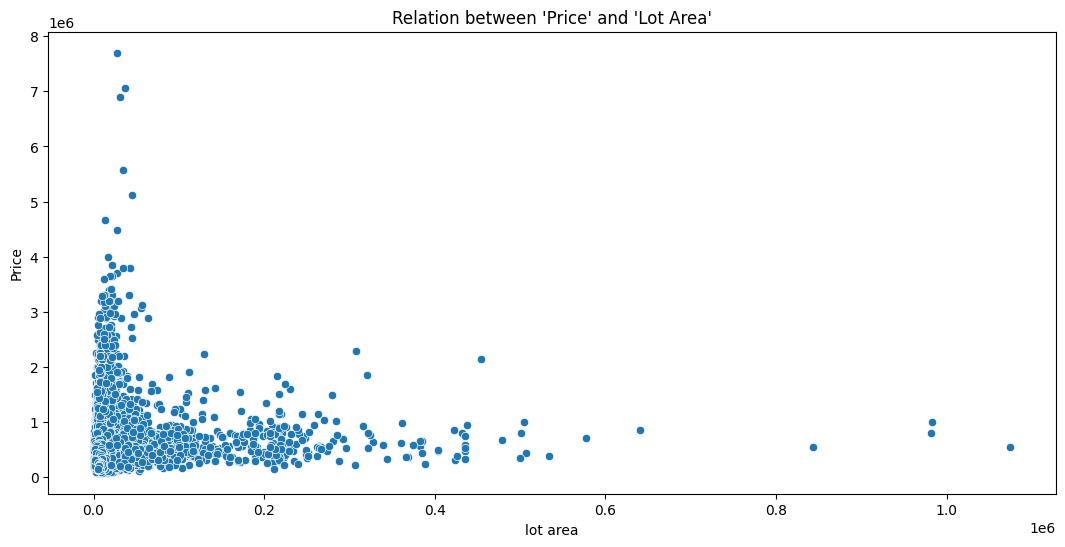

In [12]:
plt.figure(figsize = (13,6))
sns.scatterplot(data = df, x = 'lot area', y = 'Price')
plt.title("Relation between 'Price' and 'Lot Area'") 
plt.show()

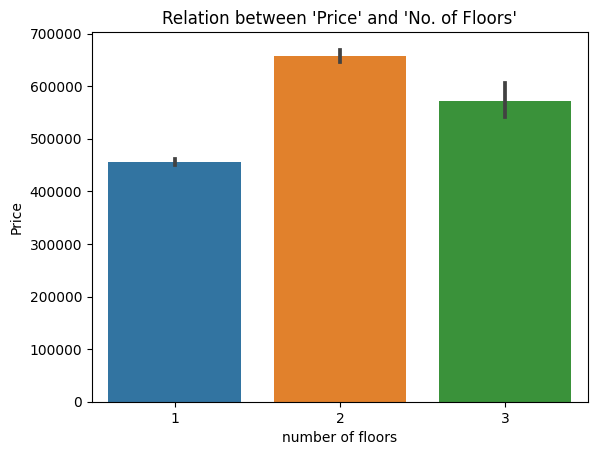

In [13]:
sns.barplot(data = df, x = 'number of floors', y = 'Price')
plt.title("Relation between 'Price' and 'No. of Floors'") 
plt.show()

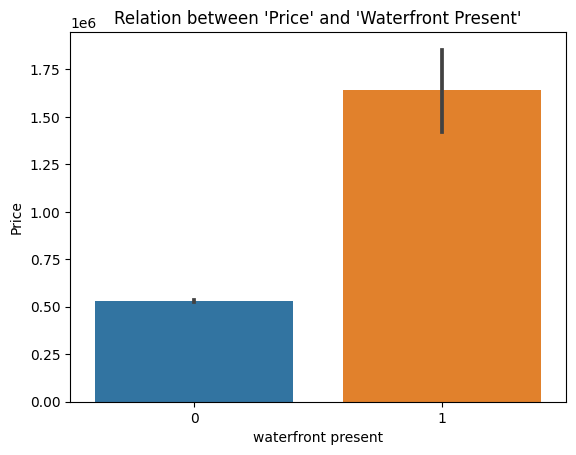

In [14]:
sns.barplot(data = df, x = 'waterfront present', y = 'Price')
plt.title("Relation between 'Price' and 'Waterfront Present'") 
plt.show()

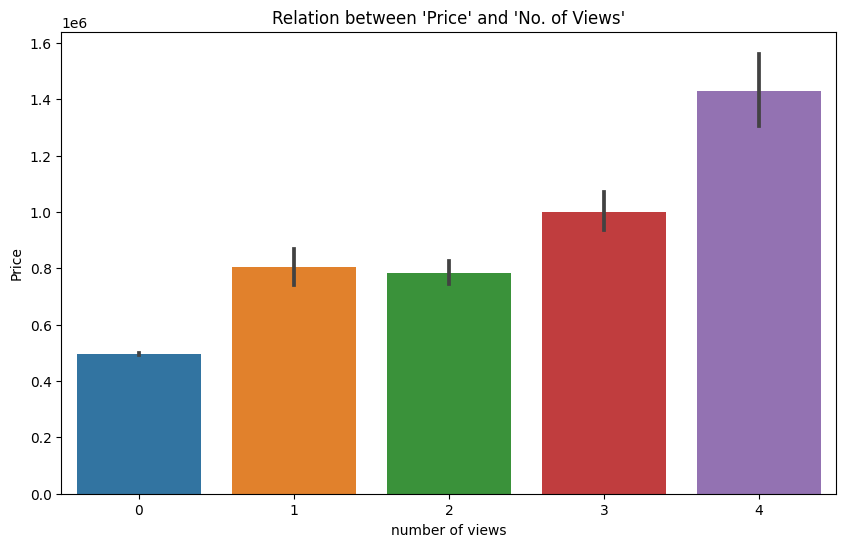

In [15]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'number of views', y = 'Price')
plt.title("Relation between 'Price' and 'No. of Views'") 
plt.show()

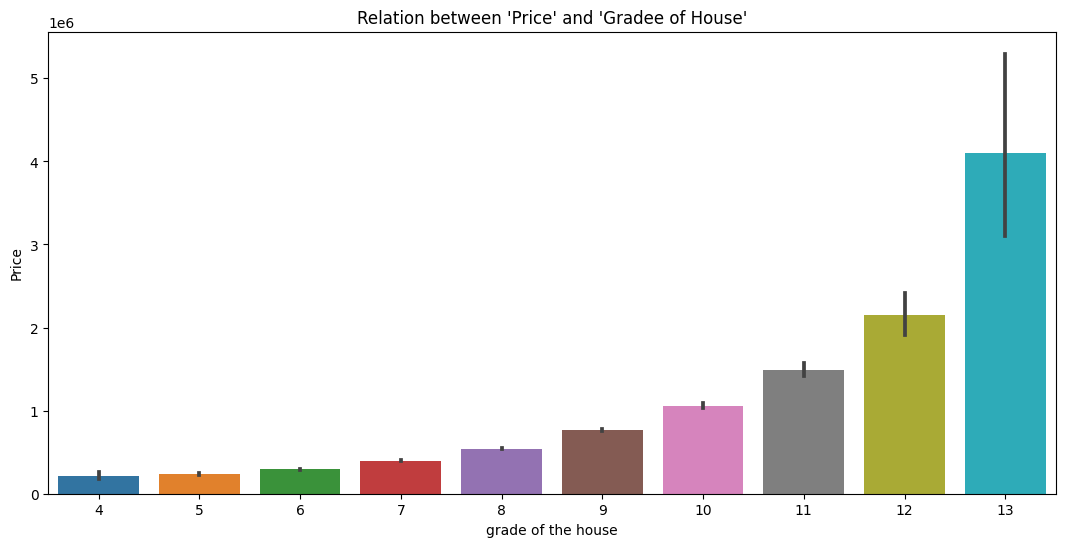

In [16]:
plt.figure(figsize = (13,6))
sns.barplot(data = df, x = 'grade of the house', y = 'Price')
plt.title("Relation between 'Price' and 'Gradee of House'") 
plt.show()

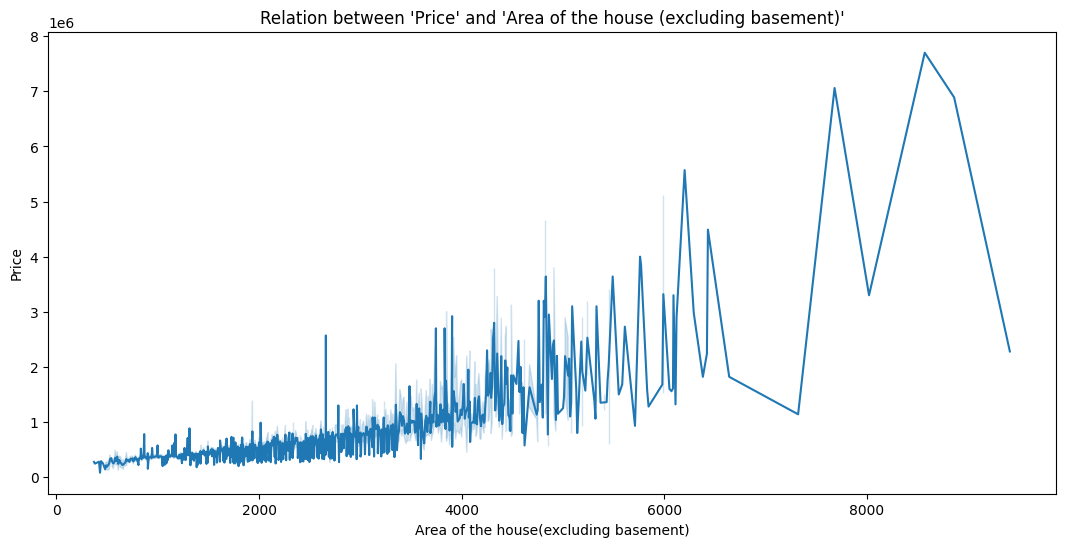

In [17]:
plt.figure(figsize = (13,6))
sns.lineplot(data = df, x = 'Area of the house(excluding basement)', y = 'Price')
plt.title("Relation between 'Price' and 'Area of the house (excluding basement)'") 
plt.show()

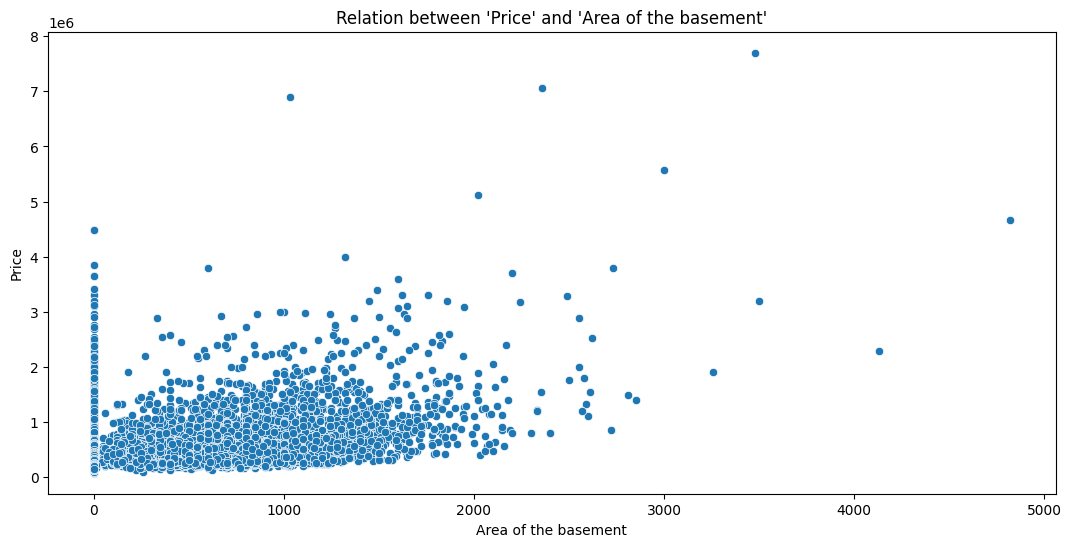

In [18]:
plt.figure(figsize = (13,6))
sns.scatterplot(data = df, x = 'Area of the basement', y = 'Price')
plt.title("Relation between 'Price' and 'Area of the basement'") 
plt.show()

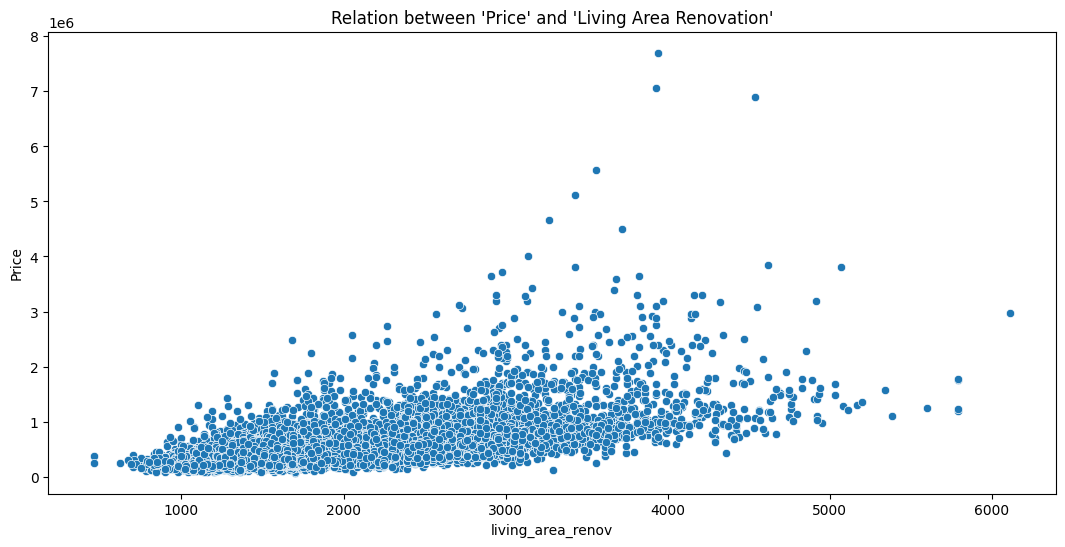

In [19]:
plt.figure(figsize = (13,6))
sns.scatterplot(data = df, x = 'living_area_renov', y = 'Price')
plt.title("Relation between 'Price' and 'Living Area Renovation'") 
plt.show()

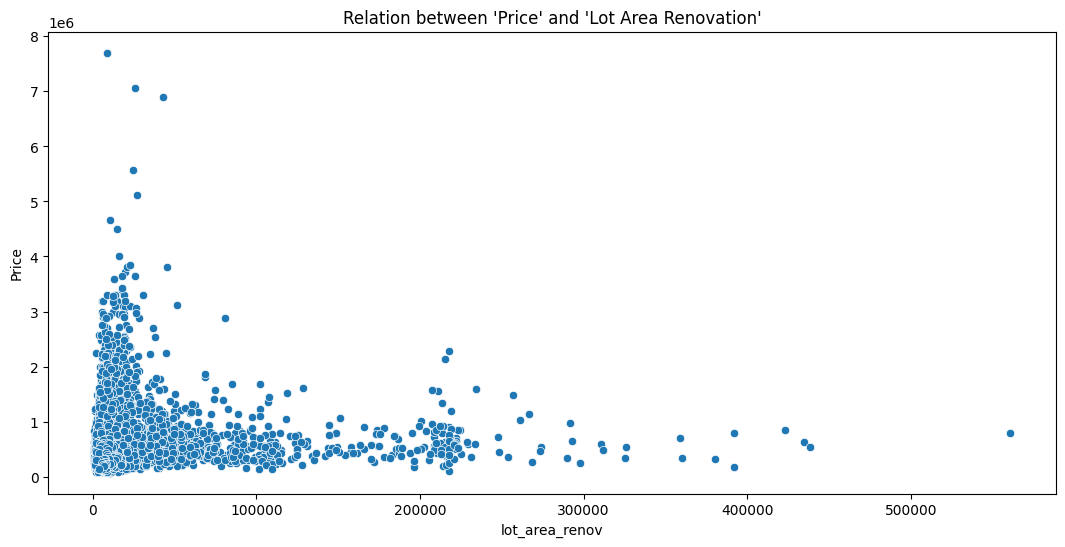

In [20]:
plt.figure(figsize = (13,6))
sns.scatterplot(data = df, x = 'lot_area_renov', y = 'Price')
plt.title("Relation between 'Price' and 'Lot Area Renovation'") 
plt.show()

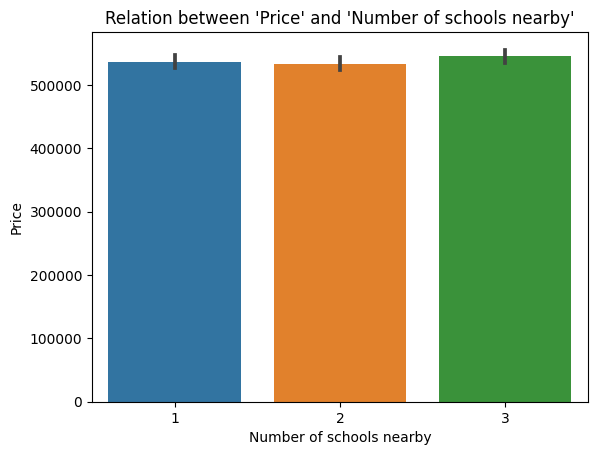

In [21]:
sns.barplot(data = df, x = 'Number of schools nearby', y = 'Price')
plt.title("Relation between 'Price' and 'Number of schools nearby'") 
plt.show()

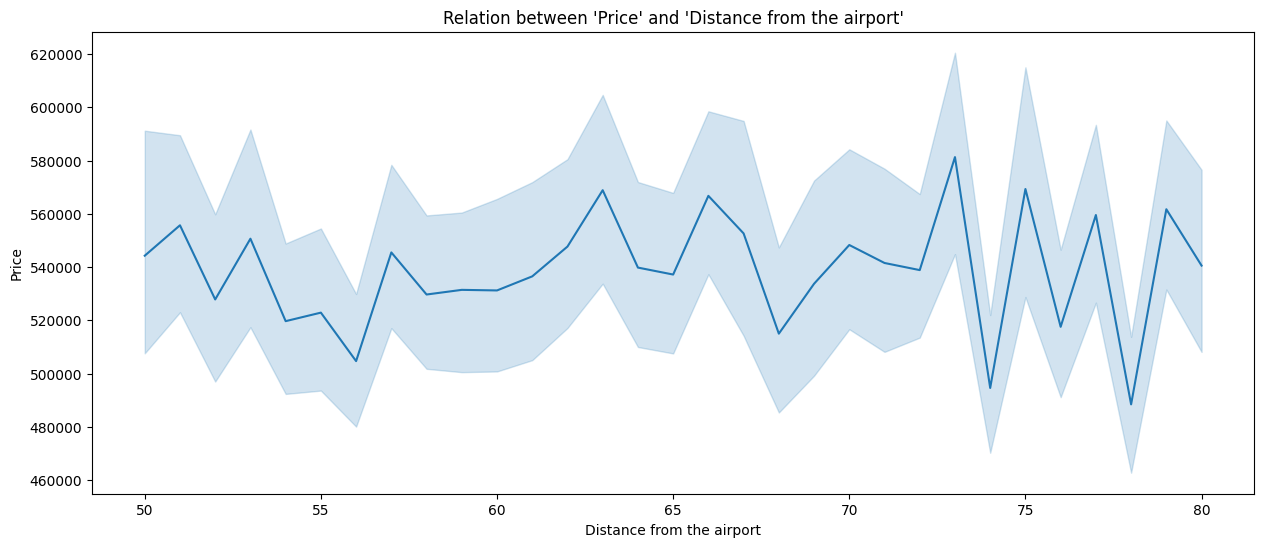

In [22]:
plt.figure(figsize = (15,6))
sns.lineplot(data = df, x = 'Distance from the airport', y = 'Price')
plt.title("Relation between 'Price' and 'Distance from the airport'") 
plt.show()

# Co-Relation Heatmap

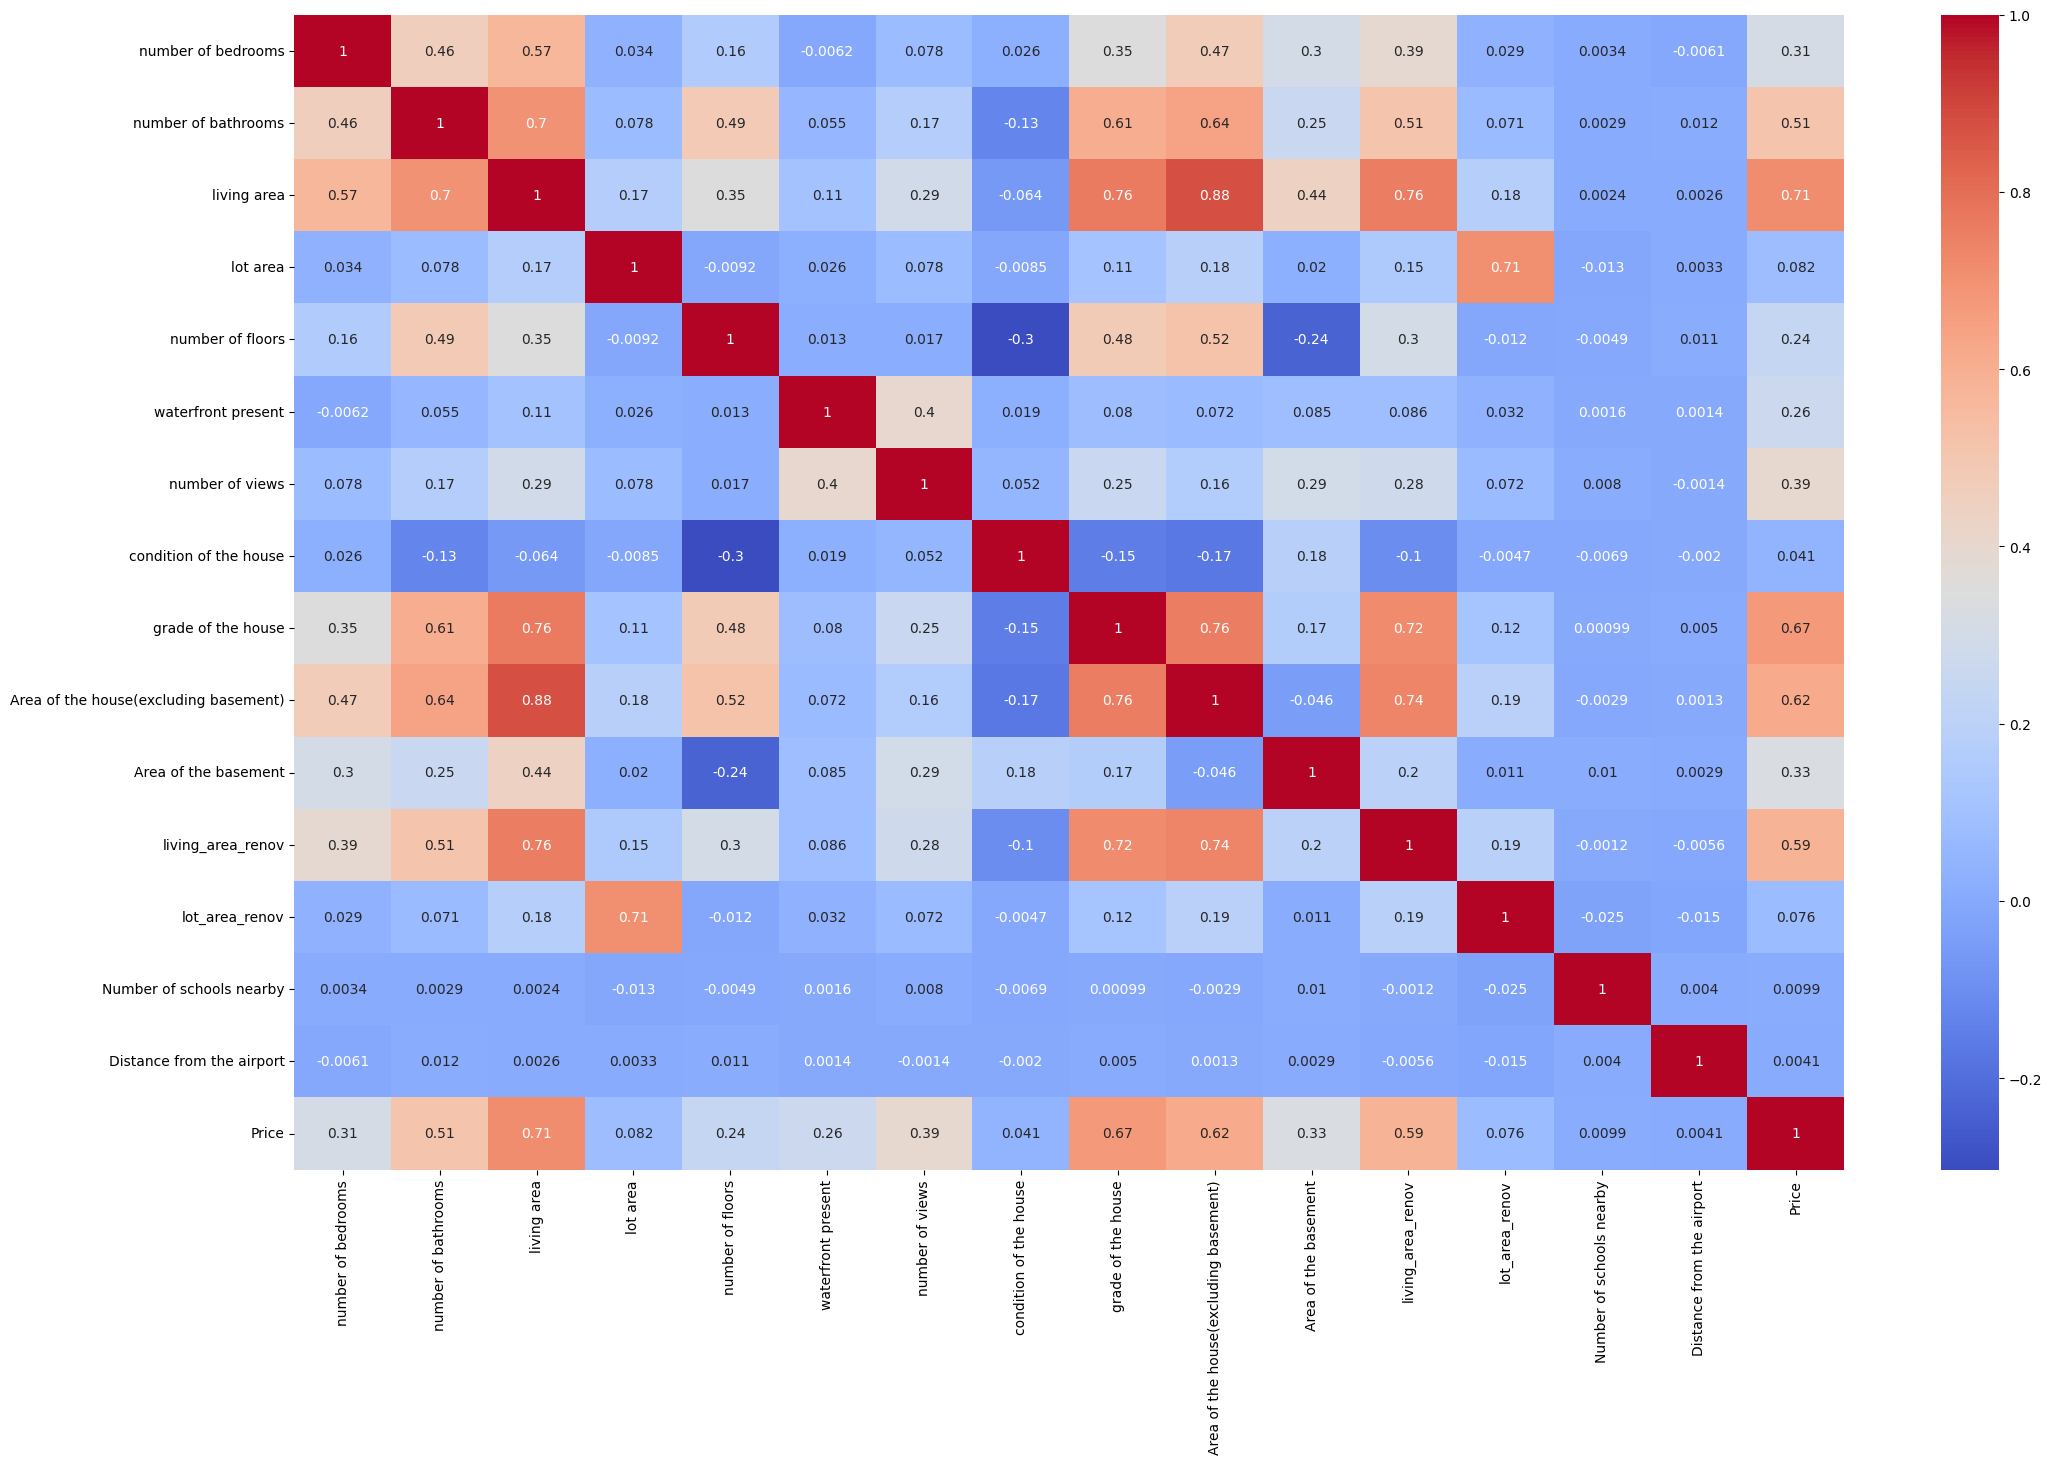

In [23]:
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Input & Output Creation

In [24]:
ip = df.drop(['Price'], axis = 1)
ip

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,4,2,2920,4000,1,0,0,5,8,1910,1010,2470,4000,2,51
1,5,2,2910,9480,1,0,0,3,8,2910,0,2940,6600,1,53
2,4,2,3310,42998,2,0,0,3,9,3310,0,3350,42847,3,76
3,3,2,2710,4500,1,0,0,4,8,1880,830,2060,4500,1,51
4,3,2,2600,4750,1,0,0,4,9,1700,900,2380,4750,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1,1556,20000,1,0,0,4,7,1556,0,2250,17286,3,76
14615,3,2,1680,7000,1,0,0,4,7,1680,0,1540,7480,3,59
14616,2,1,1070,6120,1,0,0,3,6,1070,0,1130,6120,2,64
14617,4,1,1030,6621,1,0,0,4,6,1030,0,1420,6631,3,54


In [25]:
op = df['Price']
op

0        1400000
1        1200000
2         838000
3         805000
4         790000
          ...   
14614     221700
14615     219200
14616     209000
14617     205000
14618     146000
Name: Price, Length: 14619, dtype: int64

# Train Test Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(ip, op, train_size = 0.7)
df.shape, x_train.shape, x_test.shape

((14619, 16), (10233, 15), (4386, 15))

# Standard Scaler Transform

In [27]:
sc = StandardScaler()
sc

StandardScaler()

In [28]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Implementation of ML Model

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Prediction

In [30]:
ycap = lr.predict(x_test)
ycap

array([1.06071677e+06, 3.56934824e+05, 1.03998188e+03, ...,
       5.28927101e+05, 8.63365949e+05, 3.10348316e+05])

In [31]:
pdf = pd.DataFrame({'y':list(y_test),
                    'prediction':ycap})
pdf

,y,prediction
0,1920000,1.060717e+06
1,425000,3.569348e+05
2,348000,1.039982e+03
3,150000,1.273662e+05
4,480000,4.502134e+05
...,...,...
4381,840000,7.475049e+05
4382,470000,4.286429e+05
4383,600000,5.289271e+05
4384,969950,8.633659e+05


# Metrics

In [32]:
mse = mean_squared_error(y_test, ycap)
print("Mean Squared Error: ", mse)

Mean Squared Error:  45193596846.39114


In [33]:
r2 = r2_score(y_test, ycap)
print("R2 Score:", r2)
print("Accuracy:", r2*100)

R2 Score: 0.6002194428254723
Accuracy: 60.02194428254724


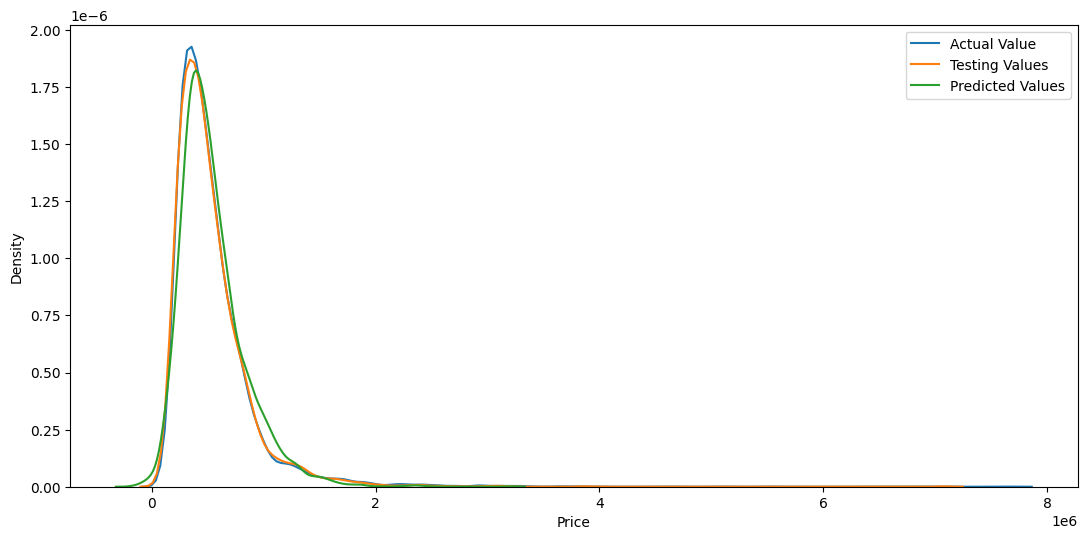

In [34]:
plt.figure(figsize = (13, 6))
sns.kdeplot(df['Price'], label = "Actual Value")
sns.kdeplot(y_test, label = "Testing Values")
sns.kdeplot(ycap, label = "Predicted Values")
plt.legend()
plt.show()